<a href="https://www.kaggle.com/code/adamdandi/building-energy-consumption-analysis?scriptVersionId=198248455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

ABC is a building management company responsible for overseeing and maintaining a wide range of assets across Indonesia, with the majority of its portfolio concentrated in Java. Their portfolio includes various types of buildings, ranging from commercial and residential complexes to industrial facilities. The company's operations involve ensuring that these buildings are running eﬃciently, providing a safe and comfortable environment for occupants, and maintaining the value of the properties. A crucial aspect of this management is the ability to optimize operational expenses, as these costs directly impact proﬁtability and long-term sustainability. One of the most signiﬁcant contributors to these operational costs is energy consumption, making energy eﬃciency a top priority for ABC to ensure both cost-effectiveness and environmental responsibility.

To achieve greater energy eﬃciency, ABC is committed to making data-driven decisions that can optimize energy usage across its managed properties. Recognizing the importance of accurate data in understanding energy consumption patterns, ABC has taken the ﬁrst step by gathering relevant data from its various assets. This data includes metrics such as energy usage rates, peak consumption times, equipment eﬃciency, and more. The next critical phase involves a detailed analysis of this data to identify areas for improvement, detect ineﬃciencies, and develop actionable strategies for reducing energy consumption. By leveraging data analysis, ABC aims to implement informed solutions that will not only lower energy costs but also contribute to more sustainable building operations, aligning with both ﬁnancial and environmental goals.

## Dataset Overview

The dataset provided is called **Building_Energy_Consumption_Data**. It contains variables that help analyze energy consumption patterns across different buildings managed by ABC, a building management company. The goal of the analysis is to optimize energy efficiency and reduce operational costs. Below are the key variables in the dataset:

### Variables

- **Building_ID**: Unique identifier for each building.
- **Year**: The year the data was collected.
- **Building_Type**: Type of building (e.g., Residential, Commercial, Industrial).
- **Floor_Area**: Total floor area of the building (in square meters).
- **Energy_Consumption**: Total energy consumption in kilowatt-hours (kWh), including air-conditioning (AC) and lighting.
- **Energy_Cost**: Total cost of energy consumption for the year.
- **Occupancy_Rate**: Percentage of building occupancy during the year.
- **Region**: Geographic location of the building (Urban, Suburban, Rural).
- **Energy_Score**: A calculated score (1-100) representing the building’s energy efficiency.
- **Province**: The province where the building is located.
- **Average_Temp**: Average temperature of the building, which may affect energy consumption.
- **Energy_Consumption_AC**: Energy consumption for air-conditioning.
- **Energy_Consumption_Lighting**: Energy consumption for lighting.

## Task Breakdown

### 1. Data Preprocessing

Before analysis, the dataset needs to be cleaned and preprocessed. The following steps are required:

- **Missing Data**: Identify missing data points and decide how to handle them (e.g., impute values or remove rows).
- **Tidying Data**: Ensure the dataset is consistent and clean (e.g., fix data type issues, correct inconsistent categories).
- **Outliers**: Detect outliers (e.g., buildings with abnormally high energy consumption) and decide how to treat them.

### 2. Exploratory Data Analysis (EDA)

Once the data is cleaned, perform an exploratory analysis to answer specific questions:

- **Province with Highest Energy Consumption**: Determine which province has the highest average energy consumption.
- **Energy Consumption per Square Meter by Building Type**: Calculate energy consumption per square meter for each building type (Residential, Commercial, Industrial) and compare them.
- **Correlation Between Temperature and Energy Consumption**: Investigate whether there is any correlation between the building's average temperature and its energy consumption. If a correlation exists, analyze how they relate to each other (e.g., positive, negative, or neutral correlation).

### 3. Data Visualization

Create visualizations to present insights from the data:

- **Heatmap**: Create a color-coded matrix displaying energy consumption per square meter by region and building type. Identify patterns in energy efficiency across different regions and building types.
- **Correlation Plot**: Visualize the correlation between **Floor Area**, **Occupancy Rates**, and **Energy Consumption** in a scatter plot to see how these variables interact.
- **Energy Consumption Trend Over Time**: Plot the trend of energy consumption by region and building type over time to understand if there are any changes in energy efficiency.

### 4. Reflections on Challenges

After completing the analysis, reflect on any challenges faced during the process, such as:

- Dealing with missing data or outliers.
- Difficulties in identifying correlations or trends in the data.
- Issues encountered while creating visualizations or interpreting the results.

Share your approach and how you overcame these challenges.

In [1]:
#importing necessery libraries for future analysis of the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#using pandas library and 'read_xlsx' function to read csv file as file already formated for us from Kaggle

data=pd.read_excel("/kaggle/input/building-energy-consumption-data/Building_Energy_Consumption_Data.xlsx")
data.head()



,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
0,1,2022,Industrial,4941,17874,50.91,Urban,83,229490100.0,Jawa Barat,24⁰ C,14300,3574
1,2,2023,Commercial,3677,37711,54.72,Urban,17,244641180.0,Jawa Barat,20⁰ C,30169,7542
2,3,2020,Commercial,1413,10539,84.15,Rural,85,256921980.0,Jawa Barat,22⁰ C,8432,2107
3,4,2022,Commercial,2031,58351,NaN,Urban,78,150017140.0,Jawa Barat,18⁰ C,46681,11670
4,5,2022,Commercial,1713,66267,65.95,Suburban,73,147403340.0,Jawa Barat,18⁰ C,53014,13253


In [3]:
#display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building_ID                        100 non-null    int64  
 1   Year                               100 non-null    int64  
 2   Building_Type                      100 non-null    object 
 3   Floor_Area (m²)                    100 non-null    int64  
 4   Energy_Consumption (kWh)           100 non-null    int64  
 5   Occupancy_Rate (%)                 92 non-null     float64
 6   Region                             100 non-null    object 
 7   Energy_Score                       100 non-null    int64  
 8   Energy_Cost (IDR)                  100 non-null    float64
 9   Province                           100 non-null    object 
 10  Average_Temp                       100 non-null    object 
 11  Energy_Consumption_AC (kWh)        100 non-null    int64  


## Data Processing

Some column names contain unnecessary spaces or special characters (e.g., “Floor_Area (m²)”, “Energy_Consumption (kWh)”, “Energy_Cost (IDR)”). These can be renamed for easier access and consistency.

In [4]:
# Renaming columns to remove special characters and spaces
data.rename(columns={
    'Floor_Area (m²)': 'Floor_Area_m2',
    'Energy_Consumption (kWh)' : 'Energy_Consumption_kWh',
    'Occupancy_Rate (%)' : 'Occupancy_Rate',
    'Energy_Cost (IDR)' : 'Energy_Cost_IDR',
    'Energy_Consumption_AC (kWh)' : 'Energy_Consumption_AC',
    'Energy_Consumption_Lighting (kWh)' : 'Energy_Consumption_Lighting'
}, inplace=True)

The Average_Temp column contains degree symbols (e.g., “24⁰ C”). We need to extract the numeric values and convert fahrenheit to celcius

In [5]:
# Use a lambda function to handle both Celsius and Fahrenheit values
data['Average_Temp_Celsius'] = data['Average_Temp'].apply(
    lambda x: (float(x.replace('⁰ F', '').strip()) - 32) * 5/9 if '⁰ F' in x else float(x.replace('⁰ C', '').strip())
)

# Display the result
print(data)

    Building_ID  Year Building_Type  Floor_Area_m2  Energy_Consumption_kWh  \
0             1  2022    Industrial           4941                   17874   
1             2  2023    Commercial           3677                   37711   
2             3  2020    Commercial           1413                   10539   
3             4  2022    Commercial           2031                   58351   
4             5  2022    Commercial           1713                   66267   
..          ...   ...           ...            ...                     ...   
95           96  2021   Residential           4549                   83069   
96           97  2021    Commercial           3241                   59748   
97           98  2023   Residential           1746                   10801   
98           99  2021   Residential           4041                   24190   
99          100  2020    Commercial           4773                   54689   

    Occupancy_Rate    Region  Energy_Score  Energy_Cost_IDR    

**Lambda function:** 
This inline function checks whether the temperature is in Fahrenheit (⁰ F) or Celsius (⁰ C).

	•	If it’s Fahrenheit, it strips the “⁰ F”, converts the value to a float, and applies the conversion formula.
    
	•	If it’s Celsius, it strips “⁰ C” and directly converts the value to a float.

In [6]:
#Check for the missing values in each column
print(data.isnull().sum())

Building_ID                    0
Year                           0
Building_Type                  0
Floor_Area_m2                  0
Energy_Consumption_kWh         0
Occupancy_Rate                 8
Region                         0
Energy_Score                   0
Energy_Cost_IDR                0
Province                       0
Average_Temp                   0
Energy_Consumption_AC          0
Energy_Consumption_Lighting    0
Average_Temp_Celsius           0
dtype: int64


Using median imputation for handling missing values in “Occupancy_Rate (%)”. This approach is robust to outliers and preserves the central tendency of the data, which is important if you plan to compare energy consumption across different buildings and provinces.

In [7]:
# Fill missing values in 'Occupancy_Rate_%' with the mean
data = data.fillna({'Occupancy_Rate': data['Occupancy_Rate'].median()})

In [8]:
# Identify duplicated rows
duplicates = data[data.duplicated(keep=False)]
print(f'Number of duplicated rows: {len(duplicates)}')
print(duplicates)

Number of duplicated rows: 0
Empty DataFrame
Columns: [Building_ID, Year, Building_Type, Floor_Area_m2, Energy_Consumption_kWh, Occupancy_Rate, Region, Energy_Score, Energy_Cost_IDR, Province, Average_Temp, Energy_Consumption_AC, Energy_Consumption_Lighting, Average_Temp_Celsius]
Index: []


In [9]:
# Assuming your dataset is a DataFrame named 'data'
# List of numerical columns to check for outliers
numerical_columns = [
    'Floor_Area_m2',
    'Energy_Consumption_kWh',
    'Occupancy_Rate',
    'Energy_Score',
    'Energy_Cost_IDR',
    'Energy_Consumption_AC',
    'Energy_Consumption_Lighting',
    'Average_Temp_Celsius'
]

# Function to identify outliers using IQR
def iqr_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers
    
# Iterate through numerical columns and print outliers values
for col in numerical_columns:
    outliers = iqr_outliers(data, col)
    if not outliers.empty:
        print(f"{col}: {outliers[col].tolist()}")

Floor_Area_m2: [-2088, -1903]
Energy_Consumption_kWh: [2000000]
Energy_Consumption_Lighting: [41252, 49589, 48206, 45915, 37635, 42454, 49089, 39372, 38995, 41534]
Average_Temp_Celsius: [0.0, 0.0, 0.0]


In [10]:
# Display and Merge Outliers Each Columns in a Table
outliers_iqr = pd.concat([iqr_outliers(data, col) for col in numerical_columns])
print("Outliers detected using IQR method:")
print(outliers_iqr)

Outliers detected using IQR method:
    Building_ID  Year Building_Type  Floor_Area_m2  Energy_Consumption_kWh  \
6             7  2020    Commercial          -2088                    7557   
25           26  2021   Residential          -1903                   27399   
82           83  2020    Industrial            673                 2000000   
13           14  2022   Residential            759                   82505   
17           18  2023   Residential           4829                   99179   
21           22  2020   Residential           3793                   96412   
22           23  2021   Residential           1545                   91831   
28           29  2023   Residential           3631                   75271   
36           37  2023   Residential           4147                   84909   
50           51  2022   Residential           4439                   98179   
55           56  2023   Residential           3632                   78744   
84           85  2022   Resi

**Approach to Managing Outliers:**
1. Floor_Area (m²) Outliers: Negative values are impossible for floor area. The best approach is to assume these are data entry errors. We can remove (-)
2. Energy_Consumption (kWh) Outlier: This outlier might require further investigation to determine the cause. If it's a genuine high-energy-consuming facility, it could be kept. However, if it's likely an error, it could be removed or replaced with a more reasonable value.
3. Energy_Consumption_Lighting (kWh) Outliers: These values might be valid, especially for industrial/commercial buildings. However, if we suspect they are misreported, we could cap these values based on the maximum reasonable threshold for similar building types.
4. Average_Temp (Celsius) Outliers: Replace these with the mean temperature based on the region or building type.

In [11]:
# Remove negative values from Floor_Area_m2
data['Floor_Area_m2'] = data['Floor_Area_m2'].abs()

# Handle outliers for Average_Temp_Celsius
# Replace zero values with a more appropriate value (e.g., average temperature)
average_temp = data['Average_Temp_Celsius'].mean()
data['Average_Temp_Celsius'] = data['Average_Temp_Celsius'].replace(0, average_temp)

# Check the cleaned outliers
for col in numerical_columns:
    outliers = iqr_outliers(data, col)
    if not outliers.empty:
        print(f"{col}: {outliers[col].tolist()}")

Energy_Consumption_kWh: [2000000]
Energy_Consumption_Lighting: [41252, 49589, 48206, 45915, 37635, 42454, 49089, 39372, 38995, 41534]


In [12]:
#display cleaned DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_ID                  100 non-null    int64  
 1   Year                         100 non-null    int64  
 2   Building_Type                100 non-null    object 
 3   Floor_Area_m2                100 non-null    int64  
 4   Energy_Consumption_kWh       100 non-null    int64  
 5   Occupancy_Rate               100 non-null    float64
 6   Region                       100 non-null    object 
 7   Energy_Score                 100 non-null    int64  
 8   Energy_Cost_IDR              100 non-null    float64
 9   Province                     100 non-null    object 
 10  Average_Temp                 100 non-null    object 
 11  Energy_Consumption_AC        100 non-null    int64  
 12  Energy_Consumption_Lighting  100 non-null    int64  
 13  Average_Temp_Celsius 

## Exploratory Data Analysis (EDA)

#### Province with Highest Energy Consumption

In [13]:
highest_consumption_province = data.groupby("Province")["Energy_Consumption_kWh"].mean().idxmax()
highest_consumption_value = data.groupby("Province")["Energy_Consumption_kWh"].mean().max()

print("Province with highest energy consumption:", highest_consumption_province)
print("Average energy consumption:", highest_consumption_value)

Province with highest energy consumption: Others
Average energy consumption: 110202.66666666667


#### Energy Consumption per Square Meter by Building Type

In [14]:
# Create a new column to calculate energy consumption per square metre
data['Energy_Consumption_per_m2'] = data['Energy_Consumption_kWh'] / data['Floor_Area_m2']

# Calculating the average energy consumption per square metre for each building type
building_energy_avg = data.groupby('Building_Type')['Energy_Consumption_per_m2'].mean().sort_values(ascending=False)
print("Average energy consumption per square meter by building type:")
print(building_energy_avg)

Average energy consumption per square meter by building type:
Building_Type
Industrial     103.920507
Commercial      39.612179
Residential     24.749410
Name: Energy_Consumption_per_m2, dtype: float64


#### Correlation Between Temperature and Energy Consumption

Correlation between temperature and energy consumption: -0.25341527394138125


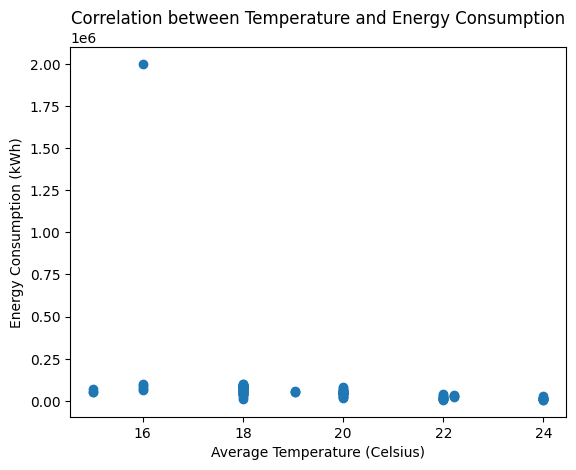

In [15]:
correlation = data["Average_Temp_Celsius"].corr(data["Energy_Consumption_kWh"])

print("Correlation between temperature and energy consumption:", correlation)

# Visualize the correlation using a scatter plot
plt.scatter(data["Average_Temp_Celsius"], data["Energy_Consumption_kWh"])
plt.xlabel("Average Temperature (Celsius)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Correlation between Temperature and Energy Consumption")
plt.show()

From the scatter plot, it appears that most of the energy consumption data is concentrated at low values, except for one very large outlier point around 2 million kWh of energy consumption. The correlation between average temperature and energy consumption is negative, with a correlation value of -0.25, indicating a **weak negative** relationship. This means that as temperature increases, in general energy consumption tends to decrease slightly, although this relationship is not very strong.

## Data Visualization

#### Heatmap: Energy Consumption per Square Meter by Region and Building Type

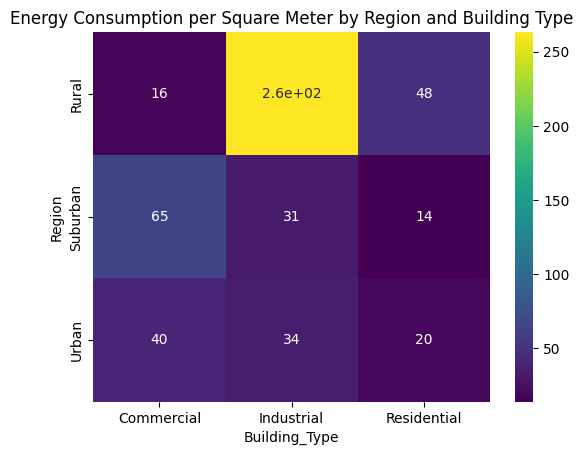

In [16]:
# Calculate energy consumption per square meter
data['Energy_Consumption_per_m2'] = data['Energy_Consumption_kWh'] / data['Floor_Area_m2']

# Create the heatmap
sns.heatmap(data.pivot_table(index='Region', columns='Building_Type', values='Energy_Consumption_per_m2'), annot=True, cmap='viridis')
plt.title('Energy Consumption per Square Meter by Region and Building Type')
plt.show()

Industrial buildings in rural regions exhibit the highest energy consumption per square meter, with a value of 260 kWh/m². This suggests that industrial buildings in rural areas are less energy-efficient compared to other regions and building types.

Commercial buildings in suburban regions have relatively high energy consumption per square meter at 65 kWh/m², suggesting a noticeable energy demand. Meanwhile, industrial and residential buildings in suburban regions have lower energy consumption at 31 and 14 kWh/m², respectively, indicating better efficiency in these buildings.

Urban areas generally show lower energy consumption across all building types. Commercial buildings in urban areas consume 40 kWh/m², industrial buildings consume 34 kWh/m², and residential buildings consume 20 kWh/m². This could suggest that urban regions may have more energy-efficient infrastructure or technologies.

Residential buildings, in general, show the lowest energy consumption across all regions, with rural, suburban, and urban regions having values of 48, 14, and 20 kWh/m², respectively. This indicates that residential buildings are more energy-efficient than commercial and industrial buildings in all regions.

#### Correlation Plot: Floor Area, Occupancy Rates, and Energy Consumption

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `na

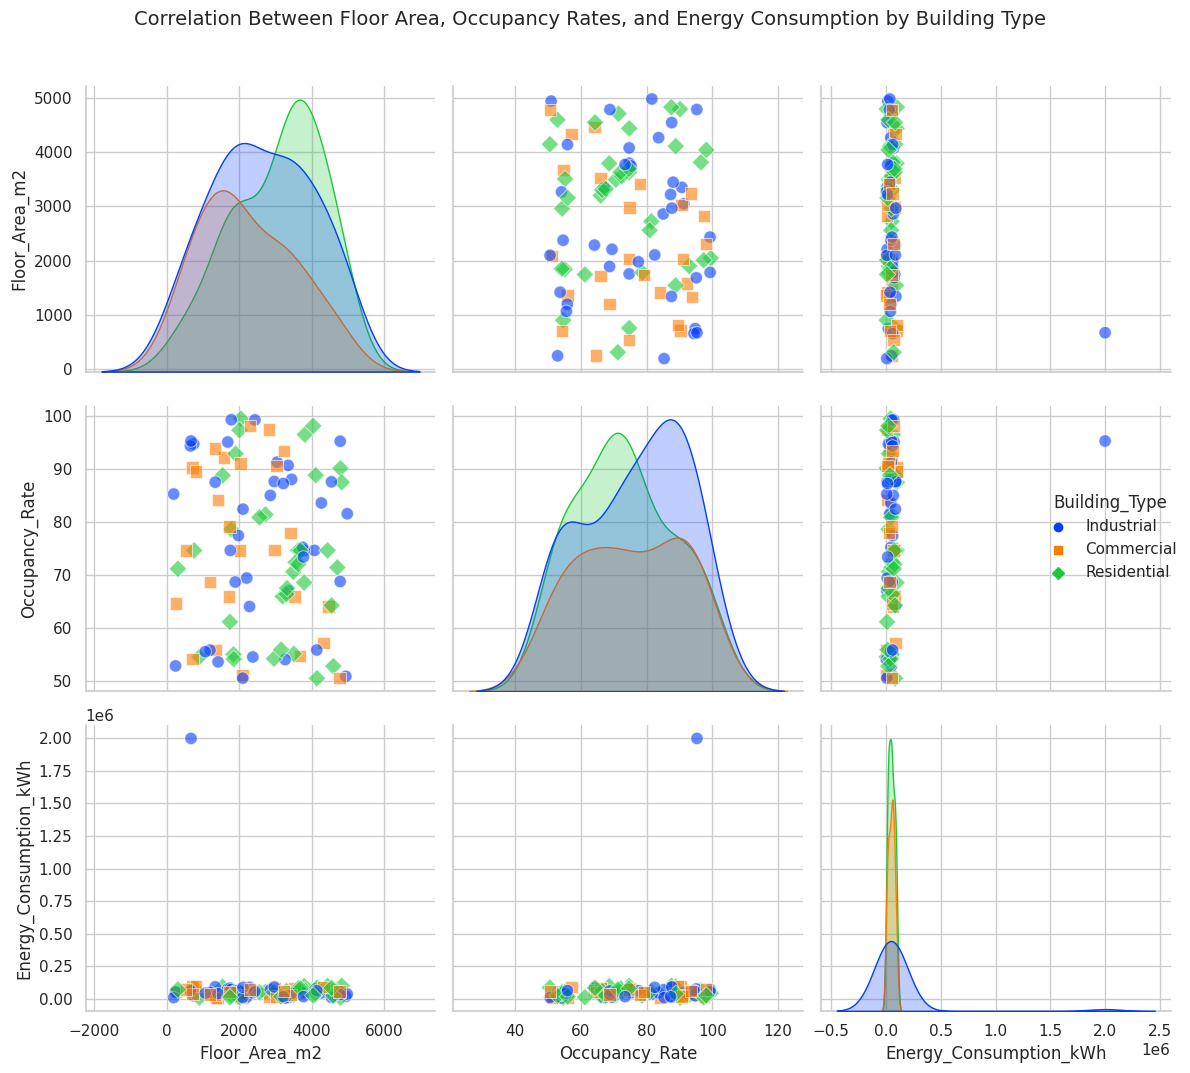

In [17]:
# Set the theme for a clean look and define a bright color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright")

# Create a pairplot for Floor Area, Occupancy Rate, and Energy Consumption with bright colors
pair_plot = sns.pairplot(
    data,
    vars=['Floor_Area_m2', 'Occupancy_Rate', 'Energy_Consumption_kWh'],
    kind='scatter',  # Scatter plot for pairwise relationships
    diag_kind='kde',  # Kernel Density Estimate for diagonal plots
    hue='Building_Type',  # Color code by Building Type
    palette=palette,
    markers=["o", "s", "D"],  # Different markers for better distinction
    height=3.5,  # Set the size of each plot
    plot_kws={'alpha':0.6, 's':80},  # Transparency and size for the scatter points
)

# Improve title and layout
pair_plot.fig.suptitle('Correlation Between Floor Area, Occupancy Rates, and Energy Consumption by Building Type', 
                       y=1.02, fontsize=14)
pair_plot.fig.tight_layout()

# Show the plot
plt.show()

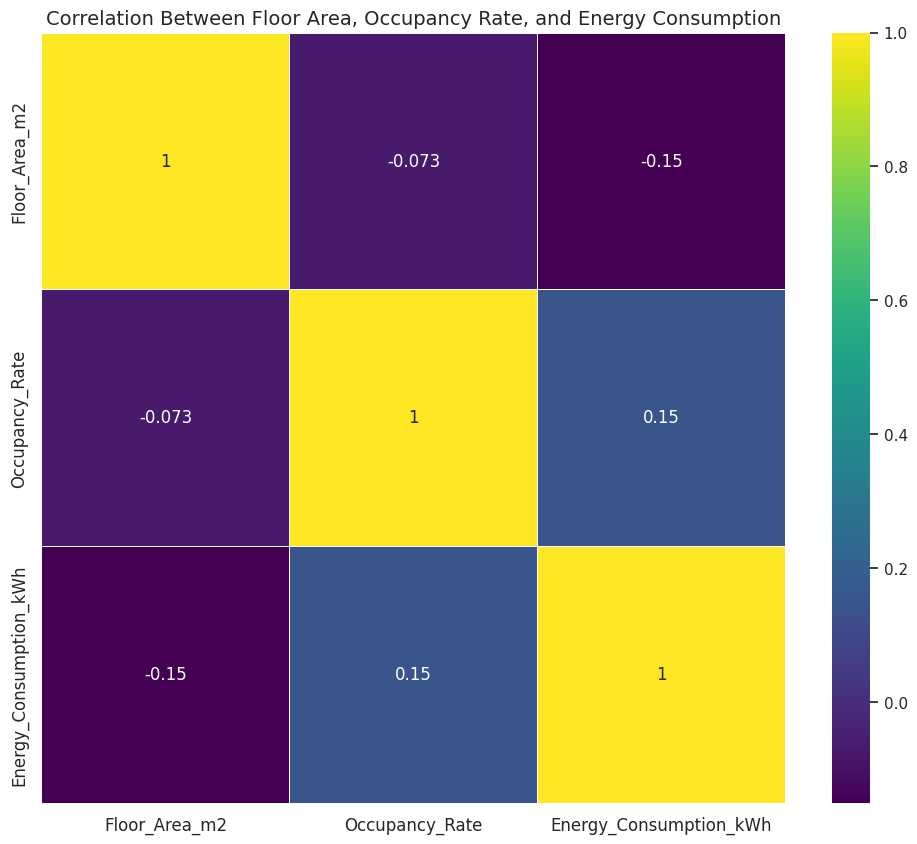

In [18]:
# Heatmap
sns.set_theme(style="whitegrid")  # Set the theme for a clean background

# Create a large figure
plt.figure(figsize=(12, 10))

# Create a correlation matrix with annotations
corr = data[['Floor_Area_m2', 'Occupancy_Rate', 'Energy_Consumption_kWh']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=.5)  # Use a vibrant color palette

# Set title and labels
plt.title('Correlation Between Floor Area, Occupancy Rate, and Energy Consumption', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

1. Floor Area and Energy Consumption:
There is a weak negative correlation (-0.15) between Floor Area and Energy Consumption. This suggests that larger buildings do not always consume more energy. The relationship is not strong, which could indicate that energy usage depends on other factors, like building type or usage patterns, rather than just the size of the building.

2. Occupancy Rate and Energy Consumption:
There is a slight positive correlation (0.15) between Occupancy Rate and Energy Consumption. This means buildings with higher occupancy rates tend to consume a little more energy, but the relationship is not very strong. This implies that occupancy does play some role, but it's not the main driver of energy consumption.

3. Floor Area and Occupancy Rate:
There is almost no correlation (-0.073) between Floor Area and Occupancy Rate. The scatter plot confirms that larger buildings are not necessarily more occupied. This suggests that building size and occupancy levels do not influence each other directly.

4. Building Types:
Industrial buildings (blue dots) show more variability in energy consumption, with some outliers that consume significantly more energy. These could represent highly energy-intensive industrial processes.
Commercial and residential buildings (orange and green markers) show less variability in energy consumption, indicating more stable and predictable energy usage patterns.

**Recommendations for ABC:**
- Focus on energy-intensive industrial buildings: Since industrial buildings have the most variation in energy consumption, especially with some outliers, ABC should investigate these buildings for inefficiencies or high energy usage processes.
- Occupancy has a minor impact on energy usage: Since the correlation between occupancy and energy consumption is weak, ABC should focus on other factors, such as building type and usage patterns, to improve energy efficiency.
- Energy-saving measures should target other factors: The weak correlations indicate that floor area and occupancy aren't major factors in energy consumption. ABC might look into operational efficiency, equipment, or energy management strategies for better results.

#### Energy Consumption Trend Over Time

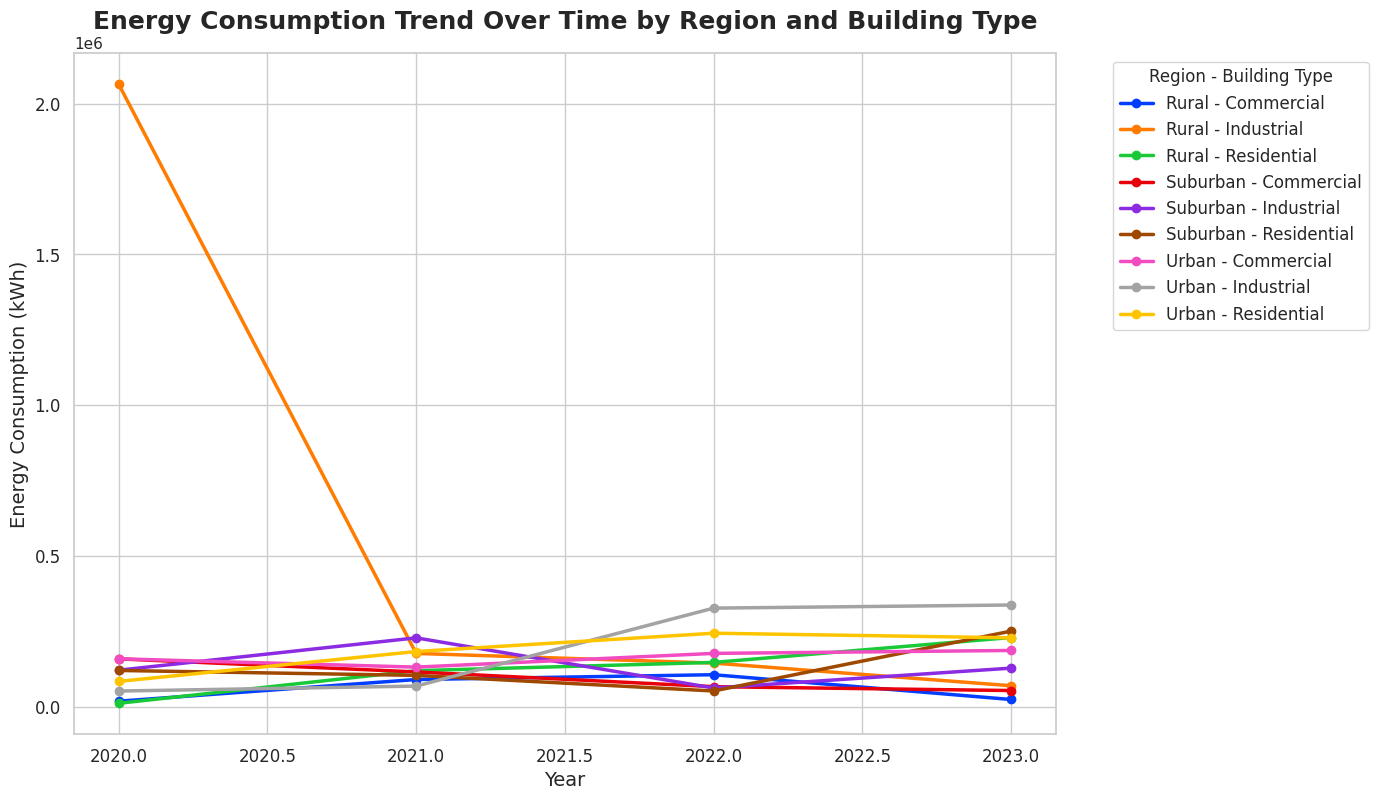

In [19]:
# Set the plot style and increase the figure size
sns.set(style="whitegrid")

# Group data by Year, Region, and Building Type to get total energy consumption
trend_data = data.groupby(['Year', 'Region', 'Building_Type'])['Energy_Consumption_kWh'].sum().reset_index()

# Create a color palette with bright colors
palette = sns.color_palette("bright", len(trend_data['Region'].unique()) * len(trend_data['Building_Type'].unique()))

# Plot the trend over time
plt.figure(figsize=(14, 8))

# Plotting energy consumption for each region and building type
for idx, (region, building_type) in enumerate(trend_data.groupby(['Region', 'Building_Type']).groups):
    region_building_data = trend_data[(trend_data['Region'] == region) & (trend_data['Building_Type'] == building_type)]
    plt.plot(region_building_data['Year'], 
             region_building_data['Energy_Consumption_kWh'], 
             label=f'{region} - {building_type}', 
             color=palette[idx], 
             linewidth=2.5, 
             marker='o')

# Add a title and labels with increased font size
plt.title('Energy Consumption Trend Over Time by Region and Building Type', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy Consumption (kWh)', fontsize=14)

# Add a legend outside the plot for better readability
plt.legend(title='Region - Building Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Increase the size of the ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


**Key Observations:**
1. Rural - Industrial Energy Consumption (Orange Line):

The energy consumption for industrial buildings in rural areas started off extremely high in 2020, reaching over 2 million kWh. However, consumption will drastically decrease in 2021, and by 2022 onwards, it will be consistent with other building types.
This drastic reduction could indicate a significant operational change or intervention in energy use within rural industrial buildings after 2020.

2. Urban - Industrial (Gray Line):

Industrial buildings in urban areas showed a gradual increase in energy consumption from 2020 to 2023, suggesting a steady upward trend in energy use for this building type in urban settings.

3. Urban - Commercial and Residential (Pink and Yellow Lines):

Both commercial and residential buildings in urban areas maintain a relatively low and stable energy consumption across the years. This indicates that energy usage in these building types remains consistent without significant fluctuations.

4. Suburban - Industrial (Purple Line):

Industrial buildings in suburban areas use more energy than most building types, except for the rural-industrial spike in 2020. Energy consumption in suburban industrial buildings will slightly decline after 2020, followed by a moderate upward trend from 2022 onwards.

5. Residential Buildings Across Regions:

Residential buildings demonstrate generally low energy consumption across all regions (rural, suburban, and urban). No dramatic increase or decrease indicates steady energy use in residential buildings, regardless of location.

6. Commercial Buildings Across Regions:

Commercial buildings in rural, suburban, and urban regions (blue, red, and pink lines) maintain a relatively steady trend in energy consumption, with minor fluctuations between 2020 and 2023. The overall consumption levels are moderate compared to industrial buildings.

##  Reflections on Challenges

While working on the data for this exercise, I encountered several challenges, particularly with outliers. I’ll share how I approached these and what I learned along the way.

1. Outliers in Floor_Area_m²:
I noticed that there were negative values, which are clearly impossible for floor area data. My immediate assumption was that these were likely data entry errors. In this case, the best approach is to remove these negative values from the dataset as they do not make logical sense. After removing them, the data becomes more reliable.

2. Outliers in Energy_Consumption_kWh:
I encountered an extremely high outlier value (2,000,000 kWh) that was difficult to manage. I wasn’t sure whether this was a genuine representation of a large facility or an error. Handling this kind of outlier requires further investigation to determine if it’s realistic for the type of building. Since I didn’t have enough contextual information, I decided to leave it as-is for now, though in real-world scenarios, consultation with subject matter experts or additional data validation might be needed. It’s a dilemma of whether to keep it or not.

3. Outliers in Energy_Consumption_Lighting (kWh):
I also found several high values in the lighting consumption data. These outliers could be realistic if the buildings in question are large commercial or industrial facilities. However, without further information on the type of building, it was hard to determine if these values were misreported. I was unsure of the best approach here and considered applying a capping technique, where values exceeding a certain threshold are replaced with a more reasonable maximum, but I didn’t apply it yet.

4. Outliers in Average_Temp:
Lastly, I found several values of 0.0°C in the temperature data. Since this isn’t realistic for average temperature readings, I decided to replace these values with the mean temperature based on the region or building type. This method ensures that the dataset remains consistent and logical.